In [1]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import matplotlib.pyplot as plt
import pandas as pd
from src.model.llms import load_llm
from dotenv import load_dotenv
import google.generativeai as genai
load_dotenv()
# genai.configure(api_key='')

True

In [2]:
import sys
sys.path.append("/Users/hanguyen/Documents/dagpt/dagpt")

MODEL_NAME = "gpt-3.5-turbo"
llm = load_llm(model_name=MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x169e59f70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x169e5bbc0>, root_client=<openai.OpenAI object at 0x169df3860>, root_async_client=<openai.AsyncOpenAI object at 0x169e59fa0>, temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1000)

In [3]:
# Invoke the model with the message
input = "Hello, how are you?"
response = llm.invoke(input)

# Print the response from the model
print(response.content)

Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?


In [4]:
df = pd.read_csv("/Users/hanguyen/Documents/dagpt/dagpt/data/raw/Departments.csv")

da_agent = create_pandas_dataframe_agent(
        llm = llm,
        df = df,
        agent_type="tool-calling",
        allow_dangerous_code=True,
        verbose=True,
        return_intermediate_steps=True
    )
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, messages=[SystemMessage(content='\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nThis is the result of `print(df.head())`:\n|    |   2 | Architect Group   |   30001 | L0001   |\n|---:|----:|:------------------|--------:|:--------|\n|  0 |   5 | Software Group    |   30002 | L0002   |\n|  1 |   7 | Design Team       |   30003 | L0003   |'), HumanMessagePromptTemplate(prompt=PromptTe

In [5]:
query = "Describe this data"
respond = da_agent(query)

/Users/hanguyen/Documents/dagpt/dagpt/.dagptvenv/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.info()'}`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   2                2 non-null      int64 
 1   Architect Group  2 non-null      object
 2   30001            2 non-null      int64 
 3   L0001            2 non-null      object
dtypes: int64(2), object(2)
memory usage: 196.0+ bytes
The data consists of 2 entries with 4 columns. Here is a description of the columns:
1. Column 0: Contains integer values with 2 non-null entries.
2. Column 1: Contains object (string) values representing the Architect Group with 2 non-null entries.
3. Column 2: Contains integer values with 2 non-null entries.
4. Column 3: Contains object (string) values with 2 non-null entries representing some codes (e.g., L0001, L0002).

The memory usage for this dataframe is approxi



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nplt.scatter(df['2'], df['30001'])\nplt.xlabel('Column 2')\nplt.ylabel('Column 30001')\nplt.title('Scatter Plot')\nplt.show()"}`




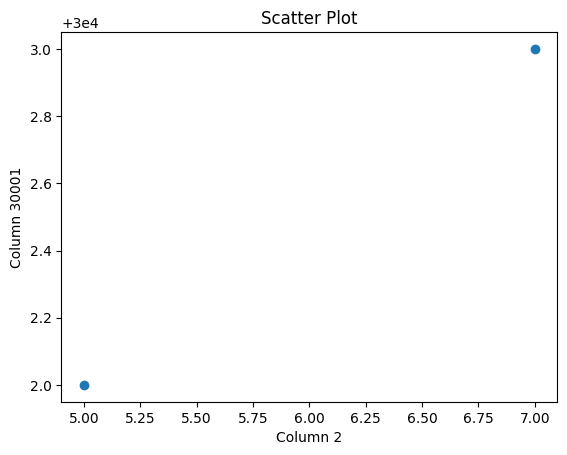

Here is a scatter plot based on the data from the dataframe `df`. The x-axis represents 'Column 2' and the y-axis represents 'Column 30001'.

> Finished chain.


In [6]:
query = "Scatter plot"
respond = da_agent(query)

In [ ]:
print(response['intermediate_steps'][-1][0].tool_input['query'])